In [1]:
#importing required libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
#loading dataset using the pandas
data = pd.read_csv('car_data.csv')
data.tail()

,buying,maintenance,doors,persons,lug_boot,safety,car_evaluation
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [3]:
#Extract relevant features from data
X=data[['buying','maintenance','doors','persons','lug_boot','safety']]
y=data['car_evaluation']
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: car_evaluation, Length: 1728, dtype: object

In [4]:
#Cleaning the dataset ie, converting categorical data to nominal data 
data_map = {
    'low' : 1,
    'med' : 2,
    'high' : 3,
    'vhigh' :4,
    'small' :1,
    'big' :3,
    'unacc' : 1,
    'acc' : 2,
    'good' : 3,
    'vgood' : 4,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5' : 5,
    '5more' : 5,
    'more' : 6
}

In [5]:
X['buying'] = data['buying'].map(data_map)
X['maintenance'] = data['maintenance'].map(data_map)
X['doors'] = data['doors'].map(data_map)
X['persons'] = data['persons'].map(data_map)
X['lug_boot'] = data['lug_boot'].map(data_map)
X['safety'] = data['safety'].map(data_map)

<ipython-input-5-71193c39c855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['buying'] = data['buying'].map(data_map)
<ipython-input-5-71193c39c855>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['maintenance'] = data['maintenance'].map(data_map)
<ipython-input-5-71193c39c855>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [6]:
#y['car_evaluation'] = data['car_evaluation'].map(data_map)
#y

In [7]:
X

,buying,maintenance,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3
3,4,4,2,2,2,1
4,4,4,2,2,2,2
...,...,...,...,...,...,...
1723,1,1,5,6,2,2
1724,1,1,5,6,2,3
1725,1,1,5,6,3,1
1726,1,1,5,6,3,2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [9]:
dt=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=800,
    min_samples_leaf=500,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0)

In [10]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=500, min_samples_split=800)

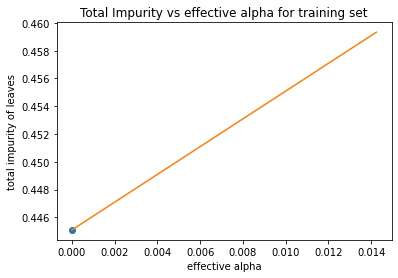

In [11]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#Using matplotlib.pyplot to plot the effect of varying ccp_alpha on error
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.plot(ccp_alphas, impurities)

In [12]:
dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dts.append(dt)

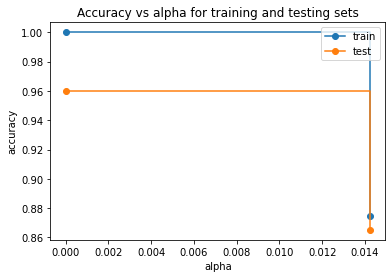

In [13]:
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [14]:
dt=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=800,
    min_samples_leaf=500,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    ccp_alpha=0.0025)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0025, min_samples_leaf=500,
                       min_samples_split=800)

In [15]:
# for windows operating system
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

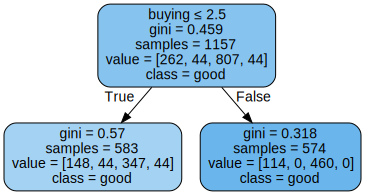

In [16]:
#Visualizing the tree using graphviz

dot_data = tree.export_graphviz(dt, out_file=None,feature_names=X_train.columns,class_names=[ 'unacc', 'acc', 'good', 'vgood'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [17]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
y_pred=dt.predict(X_test)
from sklearn.metrics import classification_report
multilabel_confusion_matrix(y_test, y_pred)

array([[[449,   0],
        [122,   0]],

       [[546,   0],
        [ 25,   0]],

       [[  0, 168],
        [  0, 403]],

       [[550,   0],
        [ 21,   0]]], dtype=int64)

In [18]:
confusion_matrix(y_test, y_pred).ravel()

array([  0,   0, 122,   0,   0,   0,  25,   0,   0,   0, 403,   0,   0,
         0,  21,   0], dtype=int64)

In [19]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
#Generates 1000 subsamples for tree
dt=RandomForestClassifier(n_estimators=5, criterion='gini', 
                          max_depth=None, min_samples_split=800, 
                          min_samples_leaf=500, 	
                          min_weight_fraction_leaf=0.0, 
                          max_features='auto', 
                          max_leaf_nodes=None, 
                          min_impurity_decrease=0.0, 
                          min_impurity_split=None, 
                          bootstrap=True, oob_score=False, 
                          n_jobs=None, 
                          random_state=None, verbose=0, 
                          warm_start=False, 
                          class_weight=None, ccp_alpha=0.0,
                          max_samples=None)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
from sklearn.metrics import classification_report
multilabel_confusion_matrix(y_test, y_pred)
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#tn, fp, fn, tp
#print(classification_report(y_test, y_pred, target_names=['Buyer','Nonbuyer']))   

array([[[449,   0],
        [122,   0]],

       [[546,   0],
        [ 25,   0]],

       [[  0, 168],
        [  0, 403]],

       [[550,   0],
        [ 21,   0]]], dtype=int64)

In [20]:
#Cross Validation

#simple validation set approach: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter  
#by default splits into five folds
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(dt, X_test, y_test)
k=scores['test_score']
k
multilabel_confusion_matrix(y_test, y_pred)

array([[[449,   0],
        [122,   0]],

       [[546,   0],
        [ 25,   0]],

       [[  0, 168],
        [  0, 403]],

       [[550,   0],
        [ 21,   0]]], dtype=int64)

In [21]:
#K-fold

from sklearn.model_selection import KFold
kf = KFold(n_splits=500)
scores=[]
for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index], y[test_index]
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test, y_test)) 
    

In [22]:
data.head()

,buying,maintenance,doors,persons,lug_boot,safety,car_evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
